### This file goes through the dump created by downloadClips and analyzes the quality of transcription by IBM STT

In [2]:
import json
import numpy as np

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [17]:
#Function to compute word error rate given two strings

def wer(r, h):

    # prepare strings
    r = r.lower()
    h = h.lower()
    
    exclude = set(['.', '!', '?', ','])
    r = ''.join(ch for ch in r if ch not in exclude)
    h = ''.join(ch for ch in h if ch not in exclude)
    
    r = r.split()
    h = h.split()
    
    # initialisation
    import numpy
    d = numpy.zeros((len(r)+1)*(len(h)+1), dtype=numpy.uint8)
    d = d.reshape((len(r)+1, len(h)+1))
    for i in range(len(r)+1):
        for j in range(len(h)+1):
            if i == 0:
                d[0][j] = j
            elif j == 0:
                d[i][0] = i
    
    print(d)
    
    # computation
    for i in range(1, len(r)+1):
        for j in range(1, len(h)+1):
            if r[i-1] == h[j-1]:
                d[i][j] = d[i-1][j-1]
            else:
                substitution = d[i-1][j-1] + 1
                insertion    = d[i][j-1] + 1
                deletion     = d[i-1][j] + 1
                d[i][j] = min(substitution, insertion, deletion)
    
    print(d)
    
    return d[len(r)][len(h)]

In [4]:
# read the output of parsing moviesounds
with open('output.json') as data_file:    
    data = json.load(data_file)

In [5]:
# compute the metrics across the output

wer_list = []
confidence_list = []
for clip in data:
    print(clip['movie'] + " " + clip['speaker'] + " " + clip['file'])
    print("Actual: " + clip['text'])
    stt = clip['ibm_output']['results']
    stt_out = ""
    stt_plain_out = ""
    confidence = []
    for frag in stt:
        stt_out = stt_out + "<" + frag['alternatives'][0]['transcript'] + str(frag['alternatives'][0]['confidence']) + ">"
        stt_plain_out = stt_plain_out + frag['alternatives'][0]['transcript']
        confidence.append(frag['alternatives'][0]['confidence'])
    confidence_list.append(np.average(confidence))
    print("Output: " + stt_plain_out)
    #print("<" + stt_out + "> " + str(np.average(confidence)))

    # compute error rate
    wer_val = wer(clip['text'], stt_plain_out)
    wer_rel = min(100, 100 * wer_val/len(clip['text'].split()))
    wer_list.append(wer_rel)
    
    
    print('WER =', str(wer_rel), " Confidence =", str(np.average(confidence)))
              
    print('~~~')
    
    

Antitrust (2001) Bob 1.wav
Actual: See! Who needs computers.
Output: see these computers 
WER = 50.0  Confidence = 0.9245
~~~
Antitrust (2001) Lisa 2.wav
Actual: Guys, we're ok. I've got it under control.
Output: gosh real got under 
WER = 75.0  Confidence = 0.708
~~~
Antitrust (2001) Milo 3.wav
Actual: Human knowledge belongs to the world!
Output: human knowledge belongs to the world 
WER = 0.0  Confidence = 0.859
~~~
Antitrust (2001) Alice 4.wav
Actual: No escaping...
Output: 
WER = 100  Confidence = nan
~~~
Antitrust (2001) Bob 5.wav
Actual: Do you got something non-geeky I can do?
Output: 
WER = 100  Confidence = nan
~~~
A Knight's Tale (2001) Chaucer 6.wav
Actual: Thank you! Thank you I'll be here all week!
Output: thank you 
WER = 77.7777777778  Confidence = 0.631
~~~
A Knight's Tale (2001) Seller 7.wav
Actual: Cat's meat! Hot wine! Cat's meat! Hot wine!
Output: 
WER = 100  Confidence = nan
~~~
A Knight's Tale (2001) Wat 8.wav
Actual: It's called a lance... hullo!
Output: it's ca

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Output: they do it to rain wash 
WER = 75.0  Confidence = 0.497
~~~
Remember the Titans (2000) Nicky Boone 64.wav
Actual: Momma? Are all white girls that crazy?
Output: my gosh 
WER = 100  Confidence = 0.504
~~~
Tremors (1990) Valentine McKee 65.wav
Actual: Who died and made you Einstein?!
Output: god made you on does 
WER = 83.3333333333  Confidence = 0.523
~~~
Tremors (1990) Valentine McKee 66.wav
Actual: I can't believe we said no to free beer!
Output: 
WER = 100  Confidence = nan
~~~
Tremors (1990) Valentine McKee 67.wav
Actual: Well, it just suddenly hit me. You know, stampede.
Output: well it just suddenly hit me you know stampede 
WER = 0.0  Confidence = 0.86875
~~~
Tremors (1990) Valentine McKee 68.wav
Actual: Could you shut up!
Output: could you 
WER = 50.0  Confidence = 0.839
~~~
Tremors (1990) Rhonda LeBeck 69.wav
Actual: Did you notice anything weird a minute ago?
Output: did you notice anything weird a minute ago 
WER = 0.0  Confidence = 0.944
~~~
Tremors (1990) Valentine

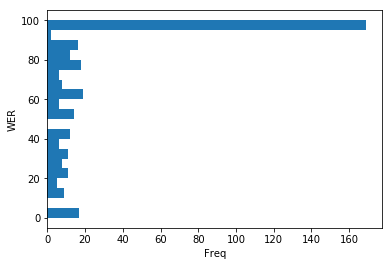

In [6]:
# plot the histogram of WER
plt.hist(wer_list, bins=20, orientation="horizontal")
plt.ylabel('WER')
plt.xlabel('Freq')
plt.show()

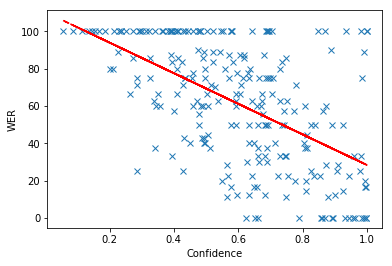

In [29]:
# plot the correlation between confidence and WER
x = []
y = []
for i in range(len(wer_list)):
    if not np.isnan(confidence_list[i]):
        y.append(wer_list[i])
        x.append(confidence_list[i])

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 

plt.plot(x,y, 'x', x, fit_fn(x), '--r')
plt.ylabel('WER')
plt.xlabel('Confidence')
plt.show()

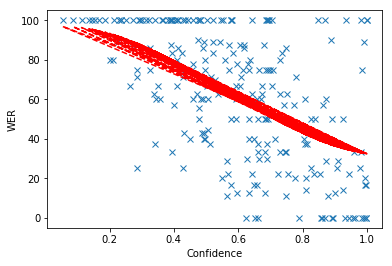

In [30]:
# plot the correlation between confidence and WER
x = []
y = []
for i in range(len(wer_list)):
    if not np.isnan(confidence_list[i]):
        y.append(wer_list[i])
        x.append(confidence_list[i])

fit = np.polyfit(x,y,3)
fit_fn = np.poly1d(fit) 

plt.plot(x,y, 'x', x, fit_fn(x), '--r')
plt.ylabel('WER')
plt.xlabel('Confidence')
plt.show()